# Define the dataset

In [2]:
import pandas as pd
df = pd.DataFrame({
    'StorageTemperature': [2, 8, 15, 25],
    'TotalMushrooms': [30,25,20,30],
    'SpoiledMushrooms': [2,4,5,20]
})
df

,StorageTemperature,TotalMushrooms,SpoiledMushrooms
0,2,30,2
1,8,25,4
2,15,20,5
3,25,30,20


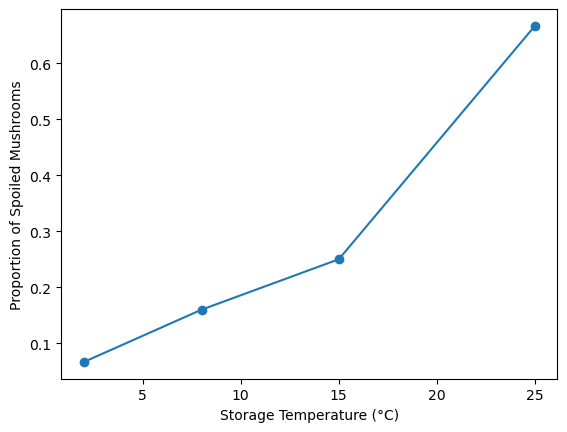

In [3]:
import matplotlib.pyplot as plt
x = df['StorageTemperature'].values
y = df['SpoiledMushrooms'].values
p = y / df['TotalMushrooms'].values
plt.figure()
plt.plot(x, p, 'o-')
plt.xlabel('Storage Temperature (°C)')
plt.ylabel('Proportion of Spoiled Mushrooms')
plt.show()

The plots show the relationship between storage temperature and mushroom spoilage. The relationship looks roughly linear, with higher temperatures leading to a higher proportion of spoiled mushrooms.

# Modelling assumptions:
1. The outcome of the \($n_i$\) mushrooms within each group \(i\) are *independent*.  
   Each mushroom in the group has probability \($p_i$\) of death.

2. The probability \($p_i$\) that a mushroom spoils depends on the temperature level \($x_i$\) as follows:

   $$
   p_i = \text{sigm}(\alpha + \beta x_i)
   $$

   where

   $$
   \text{sigm}(z) = \frac{1}{1 + e^{-z}}
   $$

3.  The parameters $\theta = [\alpha, \beta]^\top$ have independent Gaussian priors:
    \begin{align}
    \alpha &\sim \mathcal{N}(\mu_\alpha, \sigma_\alpha^2), \quad \mu_\alpha = 0, \sigma_\alpha = 2 \\
    \beta &\sim \mathcal{N}(\mu_\beta, \sigma_\beta^2), \quad \mu_\beta = 0, \sigma_\beta = 1
    \end{align}

4.  The outcomes in the four groups are independent of each other, given $𝜃$.


## 1.1: Probabilistic model

* Derive and comment the full probabilistic model.

## Bayesian Logistic Regression Model

We aim to model the spoilage of mushrooms based on temperature.

### 1. Variables
* $i$: Index for the experimental group.
* $n_i$: Total number of mushrooms in group $i$.
* $y_i$: Number of spoiled mushrooms in group $i$.
* $x_i$: Temperature level for group $i$.

### 2. Likelihood
The outcome of the $n_i$ mushrooms within each group $i$ is independent. The number of spoiled mushrooms follows a Binomial distribution:

$$y_i \sim \text{Binomial}(n_i, p_i)$$
where $p_i$ is the probability of spoilage in group $i$ and $n_i$ is the total number of mushrooms in group $i$.


The probability $p_i$ that a mushroom spoils depends on the temperature $x_i$ so we can model the log odds of spoilage as a linear function of temperature:

$$sigmoid(z) = \frac{1}{1 + e^{-z}}$$
so in our case:

$$p_i = \text{sigmoid}(\alpha + \beta x_i) = \frac{1}{1 + e^{-(\alpha + \beta x_i)}}$$


### 3. Prior
The parameters $\theta = [\alpha, \beta]^\top$ have independent Gaussian priors:

$$ \alpha \sim \mathcal{N}(0, 2^2) $$
$$ \beta \sim \mathcal{N}(0, 1^2) $$

**Derivation of the joint prior density:**
Due to independece the joint prior density is the product of the individual priors:
$$ f(\theta) = f(\alpha, \beta) = f(\alpha) \cdot f(\beta)$$

Moreover, given $ (\alpha, \beta) $ the outcomes in the four groups are independent of each other.

$$
P(\mathbf{y} \mid \alpha, \beta) = \prod_{i=1}^4 P(y_i \mid n_i, x_i, \alpha, \beta)
$$

Substituting the standard normal PDF formula $$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ with our specific hyperparameters ($\sigma_\alpha=2, \sigma_\beta=1, \mu=0$):

$$ \begin{aligned}
f(\alpha, \beta) &= \left( \frac{1}{\sqrt{2\pi \cdot 4}} e^{-\frac{\alpha^2}{2 \cdot 4}} \right) \cdot \left( \frac{1}{\sqrt{2\pi \cdot 1}} e^{-\frac{\beta^2}{2 \cdot 1}} \right) \\
&= \left( \frac{1}{2\sqrt{2\pi}} \cdot \frac{1}{\sqrt{2\pi}} \right) \cdot \exp\left( -\frac{\alpha^2}{8} - \frac{\beta^2}{2} \right) \\
&= \frac{1}{4\pi} \exp\left( \frac{-\alpha^2}{8} - \frac{4\beta^2}{8} \right)
\end{aligned}
$$



**Final Joint Prior:**
$$
f(\alpha, \beta) = \frac{1}{4\pi} \exp \left( -\frac{\alpha^2 + 4\beta^2}{8} \right)
$$



## 1.2: Maximum Likelihood estimation
* Derive an analytical expression of the likelihood function $\mathcal{L}(\theta) = P(y|\theta)$.

The total likelihood function is just the product of the likelihoods of each group:

$$
\mathcal{L}(\vec{\theta}) = \prod_{i=1}^{n} \binom{n_i}{y_i} \cdot p_i^{y_i} \cdot (1-p_i)^{n_i-y_i}
$$
For each group $i$, the likelihood of observing $y_i$ spoiled mushrooms out of $n_i$ given the spoilage probability $p_i$ is given by the Binomial distribution formula

Substituting $p_i = \mathrm{sigm}(\alpha + \beta x_i)$:

$$
= \prod_{i=1}^{n} \binom{n_i}{y_i} \cdot \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot [1-\mathrm{sigm}(\alpha + \beta x_i)]^{n_i-y_i}
$$


$$
\propto \prod_{i=1}^{n} \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot [1-\mathrm{sigm}(\alpha + \beta x_i)]^{n_i-y_i}
$$

We can ignore the binomial coefficients $\binom{n_i}{y_i}$ since they do not depend on the parameters $\theta = [\alpha, \beta]^\top$ and thus do not affect the location of the maximum likelihood estimate.
They do not depend because they are constants with respect to $\alpha$ and $\beta$.

n is the number of groups (4 in this case) NOT the number of samples.

* Derive an analytical expression of the log-likelihood function $\ell(\theta)$

Multiplying several probability mass function leads to very small numbers that can cause numerical underflow, using the log-likelihood we ensure numerical stability, in fact a log of a product becomes a sum which ensures we don't go towards zero.

Moreover, it is often easier to maximize an analytical expression using the logarithm since it is monotonically increasing, maximizing $f(x)$ is equivalent to maximize $\log(f(x))$ - the location of the maximum doesn't change.

$$
\begin{aligned}
\ell(\vec{\theta}) &= \log \mathcal{L}(\vec{\theta}) \\
&= \sum_{i=1}^{4} \log\left[ \binom{n_i}{y_i} \cdot \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot (1-\mathrm{sigm}(\alpha + \beta x_i))^{n_i-y_i} \right] \\
&= \sum_{i=1}^{4} \left[ \log \binom{n_i}{y_i} + y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right] \\
&\propto \sum_{i=1}^{4} \left[ y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right]
\end{aligned}
$$

Note: We use $i=1$ to $4$ since we have 4 temperature groups, and the correct functional form is $\alpha + \beta x_i$ (intercept + slope × temperature).

* Write a Python function corresponding to the log-likelihood function ℓ(𝜃) (possibly up
to an additive factor)

In [4]:
import numpy as np
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [5]:
def likelihood(alpha, beta):
    x_vals = df['StorageTemperature'].values
    n_vals = df['TotalMushrooms'].values
    y_vals = df['SpoiledMushrooms'].values
    likelihood_val = 1.0
    for i in range(len(x_vals)):
        p_i = sigmoid(alpha + beta * x_vals[i])
        p_i = np.clip(p_i, 1e-15, 1-1e-15)
        likelihood_val *= (p_i**y_vals[i]) * ((1 - p_i)**(n_vals[i] - y_vals[i]))

    return likelihood_val
def log_lik(alpha, beta):
    x_vals = df['StorageTemperature'].values
    n_vals = df['TotalMushrooms'].values
    y_vals = df['SpoiledMushrooms'].values
    log_lik_val = 0.0
    for i in range(len(x_vals)):
        p_i = sigmoid(alpha + beta * x_vals[i])
        p_i = np.clip(p_i, 1e-15, 1-1e-15)

        log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)
    return log_lik_val

alpha_test, beta_test = 0, 0.1
lik_val = likelihood(alpha_test, beta_test)
log_lik_val = log_lik(alpha_test, beta_test)
if np.isclose(np.log(lik_val), log_lik_val):
    print("The two functions are consistent")

The two functions are consistent


* Visualize the likelihood $\mathcal{L}(\theta)$ and the log-likelihood function $l(\theta)$ in 2D and comment the obtained figures.
    * *Hints:*
        * You may use the `pcolormesh` function of matplotlib.
        * You need to find appropriate range and step size for both $\alpha$ and $\beta$.

First we create a grid of alpha and beta values to evaluate the log-likelihood and the likelihood function over a range of parameter values. This will help us visualize how the log-likelihood varies with different combinations of alpha and beta.

In [6]:
def create_meshgrid(alpha_range=(-5,1),beta_range=(-20,20), step=0.1):
    alpha_vals=np.arange(alpha_range[0],alpha_range[1], step)
    beta_vals=np.arange(beta_range[0], beta_range[1], step)
    a_prior, b_prior = np.meshgrid(alpha_vals, beta_vals)
    return a_prior, b_prior

def create_grid_from_function(func, alpha_grid, beta_grid):
  g = np.zeros_like(alpha_grid)
  for i in range(alpha_grid.shape[0]):
    for j in range(alpha_grid.shape[1]):
      a, b = alpha_grid[i, j], beta_grid[i, j]
      g[i, j] = func(a, b)
  return g

In [7]:
def display_distribution(func, alpha_g, beta_g, func_name=''):
    grid = create_grid_from_function(func, alpha_g, beta_g)
    plt.imshow(grid[::-1], extent=(alpha_g.min(), alpha_g.max(), beta_g.min(), beta_g.max()), origin='lower', aspect='auto')
    # extent allows to set the axis limits correctly
    # also we need to invert the grid because imshow starts the y-axis from the top, 
    # that means that the first row is the highest value of beta, while in our meshgrid it's the lowest.
    plt.colorbar()
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title(f'Distribution: {func_name}')
    plt.show()


## Likelihood Visualization

I expect alpha that represent the intercept should be tuned around negative values because usually as we go lower in temperature we have low spoilage.
For the beta that represent the slope we should have a low increase in spoilage so a good fit is betwen 0 and 1

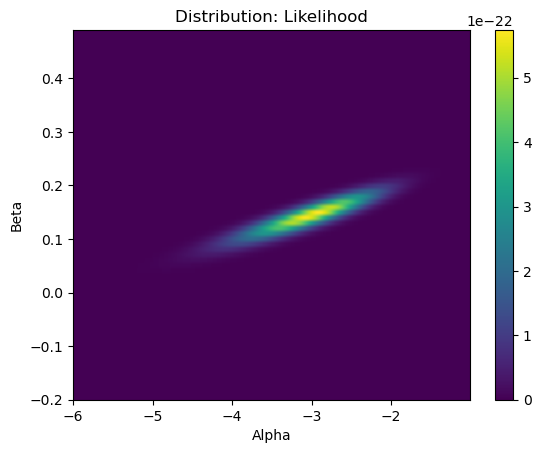

In [8]:
a_prior, b_prior = create_meshgrid(alpha_range=(-6, -1), beta_range=(-0.2, 0.5), step=0.01)
display_distribution(likelihood, a_prior, b_prior, func_name='Likelihood')

The likelihood plot shows wave like patterns because we're working with very small numbers, in fact we're hitting numerical precision limits that leads to numerical underflow. This makes it difficult to interpret the likelihood surface and identify the maximum likelihood estimates.

## Log-Likelihood Visualization

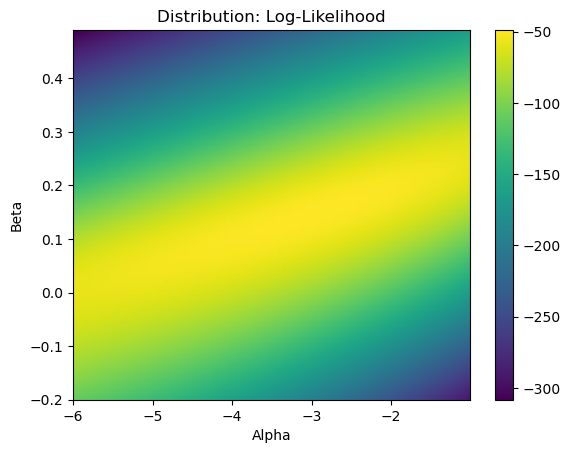

In [9]:
display_distribution(log_lik, a_prior, b_prior, func_name='Log-Likelihood')

The log likelihood plot is smoother and more interpretable than the likelihood plot. The log transformation helps to mitigate the numerical issues seen in the likelihood plot, making it easier to identify the region of maximum likelihood.

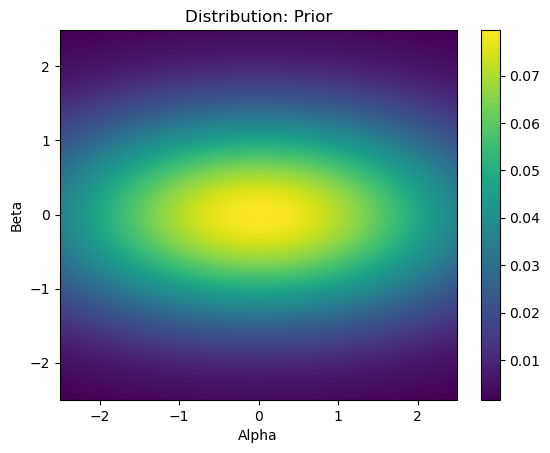

In [10]:
a_prior, b_prior = create_meshgrid(alpha_range=(-2.5,2.5), beta_range=(-2.5, 2.5), step=0.01)

prior = lambda a,b: (1/(4*np.pi)) * np.exp( - (a**2 + 4*b**2)/8 )
prior_grid = display_distribution(prior, a_prior, b_prior, func_name='Prior')    

The prior is mildly informative, centering around (0,0) with lower variance along the beta axis, reflecting our belief that the slope of the relationship between temperature and spoilage is likely to be small.

---

* Compute the maximum likelihood (ML) estimates $\alpha^{ML}$, $\beta^{ML}$ of the parameters $\alpha$, $\beta$ through numerical optimizations.
* *Hints:*
    * You may use the Python function `scipy.optimize.minimize`.
    * You may look at the figures above to define a good starting point for optimization.
    * You may either minimize the likelihood or the log-likelihood. What is your choice?
* Visualize the likelihood function in 2D together with the ML estimate. Comment the obtained figure.

When finding the ML estiamates we compute the paramaters that mostly generates the observed data.


maximum Likelihood Estimates:
alpha: -3.0000
beta: 0.1000
maximum likelihood: 0.0000


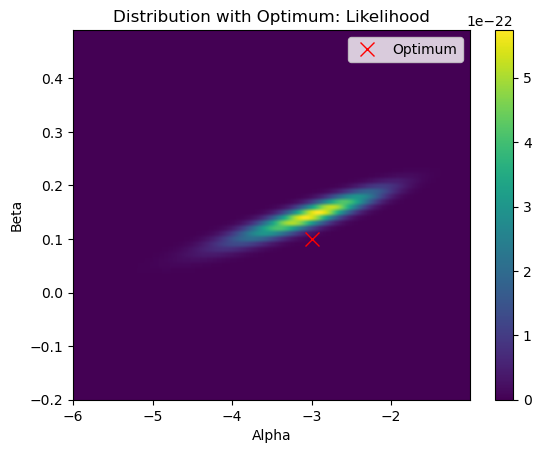

In [11]:
from scipy.optimize import minimize

def optimize_function(func, initial_guess):
    result = minimize(func, initial_guess)
    return result.x, result.fun

def display_distribution_with_optimum(func, alpha_g, beta_g, optimum, func_name=''):
    grid = create_grid_from_function(func, alpha_g, beta_g)
    plt.figure()
    plt.imshow(grid[::-1], extent=(alpha_g.min(), alpha_g.max(), beta_g.min(), beta_g.max()), origin='lower', aspect='auto')
    plt.colorbar()
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title(f'Distribution with Optimum: {func_name}')
    plt.plot(optimum[0], optimum[1], 'rx', markersize=10, label='Optimum')
    plt.legend()
    plt.show()

initial_guess = [-3, 0.1]
opt_lik_params, opt_lik_value = optimize_function(lambda params: -likelihood(params[0], params[1]), initial_guess)

print(f"maximum Likelihood Estimates:")
print(f"alpha: {opt_lik_params[0]:.4f}")
print(f"beta: {opt_lik_params[1]:.4f}")
print(f"maximum likelihood: {-opt_lik_value:.4f}")

alpha_range_min = min(-6, opt_lik_params[0] - 1)
alpha_range_max = max(-1, opt_lik_params[0] + 1)
beta_range_min = min(-0.2, opt_lik_params[1] - 0.1)
beta_range_max = max(0.5, opt_lik_params[1] + 0.1)

a_grid, b_grid = create_meshgrid(alpha_range=(alpha_range_min, alpha_range_max), beta_range=(beta_range_min, beta_range_max), step=0.01)
display_distribution_with_optimum(likelihood, a_grid, b_grid, opt_lik_params, func_name='Likelihood')
print()

Trying to optimizing the likelihood directly can be numerically unstable due to the very small values involved, leading to underflow issues. Therefore, I chose to optimize the log-likelihood instead, which transforms products into sums and helps maintain numerical stability. However there might still a method to optimize the likelihood directly using log-sum-exp trick or other numerical techniques to handle small values.

Maximum Likelihood Estimates:
Alpha: -2.9776
Beta: 0.1439
Maximum log-likelihood: -48.9011


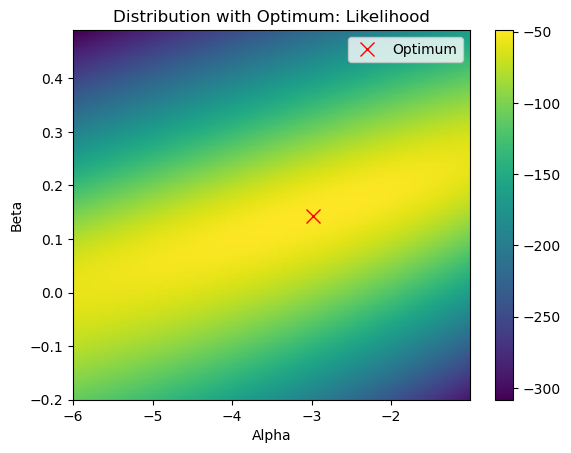

In [12]:
initial_guess = [0, 0]
opt_lik_params, opt_lik_value = optimize_function(lambda params: -log_lik(params[0], params[1]), initial_guess)

print(f"Maximum Likelihood Estimates:")
print(f"Alpha: {opt_lik_params[0]:.4f}")
print(f"Beta: {opt_lik_params[1]:.4f}")
print(f"Maximum log-likelihood: {-opt_lik_value:.4f}")

# Zoom out even more for global view
alpha_range_min = -6
alpha_range_max = -1
beta_range_min = -0.2
beta_range_max = 0.5

a_grid, b_grid = create_meshgrid(alpha_range=(alpha_range_min, alpha_range_max), beta_range=(beta_range_min, beta_range_max), step=0.01)
display_distribution_with_optimum(log_lik, a_grid, b_grid, opt_lik_params, func_name='Likelihood')
print()

The optimization yields good results.
The optimum alpha at -2.9 means that a 0 degrees celsius for the storage temperature results in a low log-odds of spoilage, which is consistent with the expectation that lower temperatures reduce spoilage risk.
The beta optimum at 0.14 means that for each 1 degree celsius the log-odds of spoilage increase by 0.14.
To find the real probabilities we can apply the sigmoid function to these log-odds values.



In [13]:
alpha_optimal = opt_lik_params[0]
beta_optimal = opt_lik_params[1]
real_prob = sigmoid(alpha_optimal)
print(f"Spoilage probability at 0°C {real_prob*100}%")

real_prob_25 = sigmoid(alpha_optimal + beta_optimal*25)
print(f"Spoilage probability at 25°C {real_prob_25*100}%")

Spoilage probability at 0°C 4.844970724988596%
Spoilage probability at 25°C 65.02135940540742%


In [14]:
def display_distribution_with_two_optima(func1, alpha_g, beta_g, opt1, opt2, func_name1, func_name2):
    grid1 = create_grid_from_function(func1, alpha_g, beta_g)
    plt.figure()
    plt.imshow(grid1[::-1], extent=(alpha_g.min(), alpha_g.max(), beta_g.min(), beta_g.max()), origin='lower', aspect='auto')
    plt.colorbar()
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title(f'Distribution with Optima: {func_name1} and {func_name2}')
    plt.plot(opt1[0], opt1[1], 'rx', markersize=10, label=f'Optimum {func_name1}')
    plt.plot(opt2[0], opt2[1], 'go', markersize=10, label=f'Optimum {func_name2}')
    plt.legend()
    plt.show()

## 1.2: Maximum A Posteriori Estimation

* Derive an analytical expression of the posterior $f(\theta|y)$, up to a multiplicative factor not depending on $\theta$.
    * *Hint:* Exploit the already-obtained likelihood and the known functional form of the Gaussian pdf.


We can use the bayes theorem to derive the posterior distribution of the parameters given the data:

$$
f(\theta | y) \propto \mathcal{L}(\theta) \cdot f(\theta)
$$

Substituting the expressions for the likelihood and the prior, note that we can ignore the binomial coefficients in the likelihood since they do not depend on $\theta$:
$$

f(\theta | y) \propto \prod_{i=1}^{n} \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot [1-\mathrm{sigm}(\alpha + \beta x_i)]^{n_i-y_i} \\
 \cdot \frac{1}{4\pi} \exp \left( -\frac{\alpha^2 + 4\beta^2}{8} \right)


$$




* Derive an analytical expression of the log-posterior $g(\theta)=\log f(\theta|y)$, up to an additive factor not depending on $\theta$.




We start by taking the posterior from the previous point and then taking the logarithm:

$$
\begin{aligned}
g(\theta) = \log f(\theta|y) &= \sum_{i=1}^{4} \left[ y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right] \\
&\quad + \log\left(\frac{1}{4\pi}\right) - \frac{\alpha^2 + 4\beta^2}{8}
\end{aligned}
$$

We can ignore $\log(1/4\pi)$ because it is a constant with respect to $\theta$.

$$
g(\theta) \propto \sum_{i=1}^{4} \left[ y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right] - \frac{\alpha^2 + 4\beta^2}{8}
$$

This final formula repersents the **log-likelihood** plus the **log-prior**.

* Write the unnormalized log-posterior (up to a multiplicative/additive factor, respectively) as Python functions.


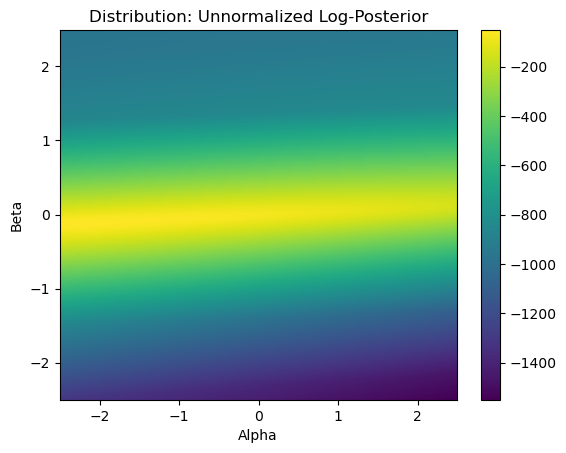

In [15]:
def unnormalized_log_posterior(alpha, beta):
    return log_lik(alpha, beta) + np.log(prior(alpha, beta))
display_distribution(unnormalized_log_posterior, a_prior, b_prior, func_name='Unnormalized Log-Posterior')


* Compute the maximum a posteriore estimates $\alpha^{MAP}$, $\beta^{MAP}$.


In [16]:
initial_guess = [2,2]
opt_map_params, opt_map_value = optimize_function(lambda params: -unnormalized_log_posterior(params[0], params[1]), initial_guess)
    
print(f"Aplha MAP estimate: {opt_map_params[0]}")
print(f"Beta MAP estimate: {opt_map_params[1]}")
print(f"Optimal value: {opt_map_value}")

Aplha MAP estimate: -2.7707047073094033
Beta MAP estimate: 0.13384979380128692
Optimal value: 52.471638848708494


* Visualize the MAP and the ML estimate together with the unnormalized posterior in 2D. Comment the results.

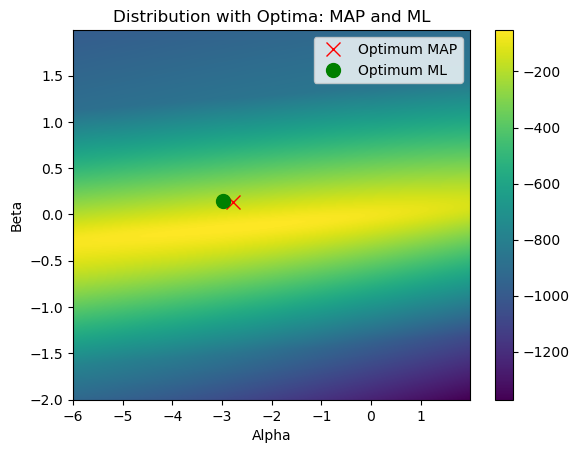

In [17]:
opt_ml_params, opt_ml_value = optimize_function(lambda params: -log_lik(params[0], params[1]), initial_guess)
a_prior, b_prior = create_meshgrid(alpha_range=(-6, 2), beta_range=(-2, 2), step=0.01)
display_distribution_with_two_optima(unnormalized_log_posterior, a_prior, b_prior, opt_map_params, opt_ml_params, 'MAP', 'ML')

The MAP estimate incorporates both the observed data and our prior beliefs about the parameters (maximising log-posterior). In contrast, the ML estimate relies solely on the observed data.(maximizing prior)

posterior ∝ likelihood × prior
$$ f(\theta | y) \propto \mathcal{L}(\theta) \cdot f(\theta) $$

MAP and ML estimate are close, this means that the prior has little influence because the data dominates.

So the less the informative the prior the less the influence on the posterior, so we rely more on the data. In this case the prior is mildly informative so it has some influence.

To remind ourselves, the MAP is bayesian and ML is frequentist.




## 1.3: Brute-force Posterior Estimation

* Compute a gridding approximation of the normalized posterior.
    * Use logarithm transformations for better numerical stability.


To go from the log-posterior to posterior we can just exponentiate the log-posterior values. However, if we want ensure numerical stability, we can substract the maximum log-posterior value from all log-posterior values before exponentiating. This prevents very large exponentials that can lead to overflow. In this way we do numerical normalization, in fact we ensure the maxium value of the exponentiated values is 1.



In [21]:
log_unnormalized_post_grid = create_grid_from_function(unnormalized_log_posterior, a_prior, b_prior)

# we just shift to ensure we work in a numerical stable range 
unnorm_post = np.exp(log_unnormalized_post_grid - np.max(log_unnormalized_post_grid))

Up until now we calculated the posterior without normalizing it. In fact we still need to normalize it so that it integrates to 1 over the parameter space and gridding serves this purpose well. If we sum the unnormalized posterior we get this:


In [22]:
np.sum(unnorm_post)

np.float64(443.4474687432556)

We calculate the normalized posterior by integrating over the paramater space. This pdf tells the probability of observing the data under your model considering every possible combination of parameters weighted by how much was plausible a priori.

We define C as the normalizing constant


\begin{align*}
\int_{\vec{\theta}} \frac{1}{C} f(\vec{\theta}) \cdot \mathcal{L}(\vec{\theta}) \, d\vec{\theta} &= 1 \\
\iff\; C = \int_{\vec{\theta}} f(\vec{\theta}) \cdot \mathcal{L}(\vec{\theta}) \, d\vec{\theta} \\
\iff\; C = \int_\alpha \int_\beta f(\alpha, \beta) \cdot \mathcal{L}(\alpha, \beta) \, d\beta \, d\alpha
\end{align*}

* Compute the marginal posterior distributions of $\alpha$ and $\beta$ from the gridding approximation.


* Using the grid-based approximation of the posterior, compute the posterior mean of $\alpha$ and $\beta$.


## 1.4: Metropolis

* Obtain a sample-based approximation of the posterior $f(\theta|y)$ by implementing the Metropolis algorithm from scratch.
    * Use logarithm transformation for better numerical robustness.
    * Remove the first 1000 samples (they depend on the initial conditions; this is the burn-in period).
    * Run multiple chains and compare visually the posterior distribution provided by the different chains. Do they overlap well?
    * Inspect the trace. Does it show a strong correlation? Which is the rate of acceptance (aim at 50%)?
    * Adjust the algorithm settings if needed, and show how the sampling performs before and after the adjustment.
* Compare the Metropolis samples with the gridding-based approximation of the posterior distribution $f(\theta|y)$ and comment the result.